In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv("housing.csv")

In [181]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [182]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [183]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [184]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [185]:
df.duplicated().sum()

0

In [186]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [187]:
df.shape

(20640, 10)

In [188]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [189]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [190]:
ocean_col = 'ocean_proximity'
df = pd.get_dummies(df, columns=[ocean_col], drop_first=True)

In [191]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


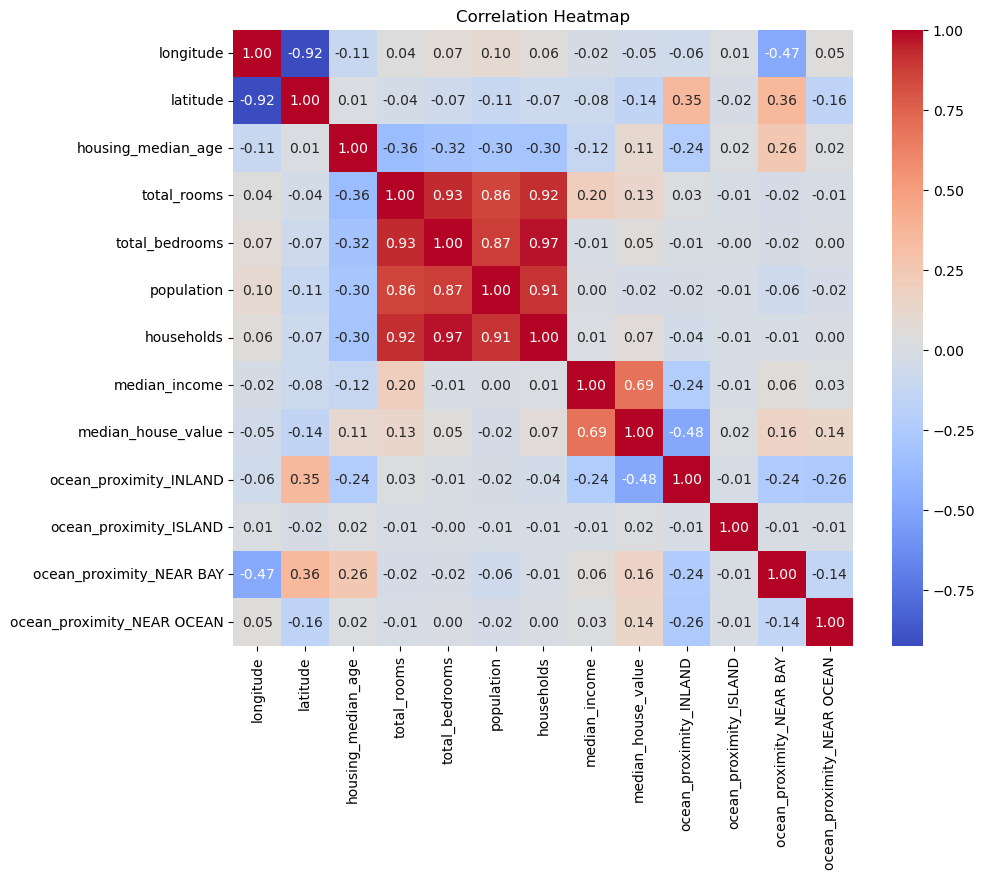

In [192]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [194]:
x = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42 )

In [196]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [197]:
linearReg = LinearRegression()
linearReg.fit(x_train_scaled, y_train)

LinearRegression()

In [198]:
y_train_predict = linearReg.predict(x_train_scaled)
y_test_predict = linearReg.predict(x_test_scaled)

In [199]:
def metrics(model_name, y_train, y_train_pred, y_test, y_test_pred):
    print(f"--- {model_name} Metrics ---")
    print(f"Train R2: {r2_score(y_train, y_train_pred):.4f} | Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
    print(f"Test R2:  {r2_score(y_test, y_test_pred):.4f} | Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}\n")

metrics("Linear Regression", y_train, y_train_predict, y_test, y_test_predict)

--- Linear Regression Metrics ---
Train R2: 0.6497 | Train RMSE: 68433.9374
Test R2:  0.6254 | Test RMSE:  70060.5218



In [200]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train_scaled, y_train)
y_test_lasso = lasso.predict(x_test_scaled)
metrics("Lasso Regression (L1)", y_train, lasso.predict(x_train_scaled), y_test, y_test_lasso)

--- Lasso Regression (L1) Metrics ---
Train R2: 0.6497 | Train RMSE: 68433.9374
Test R2:  0.6254 | Test RMSE:  70060.5151



In [201]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
y_test_ridge = ridge.predict(x_test_scaled)
metrics("Ridge Regression (L2)", y_train, ridge.predict(x_train_scaled), y_test, y_test_ridge)

--- Ridge Regression (L2) Metrics ---
Train R2: 0.6497 | Train RMSE: 68433.9448
Test R2:  0.6255 | Test RMSE:  70057.4169



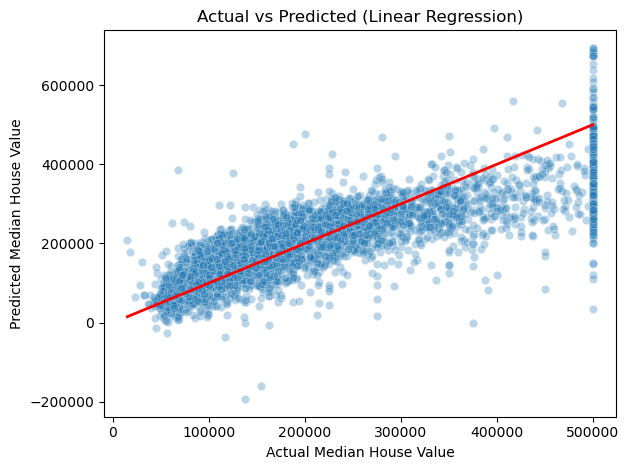

In [202]:
sns.scatterplot(x=y_test, y=y_test_predict, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")

plt.tight_layout()
plt.show()